In [1]:
import pandas as pd
import re

In [2]:
data_english = pd.read_csv("dataset_en.csv")
data_italian = pd.read_csv("dataset_it.csv")
data_french = pd.read_csv("dataset_fr.csv")

English data

In [3]:
data_english['char_count'] = data_english['full_text'].apply(lambda x: len(x))
data_english['word_count'] = data_english['full_text'].apply(lambda x: len(x.split()))

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=.5)

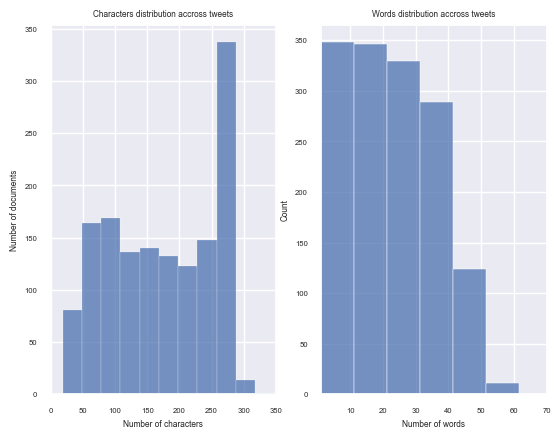

In [5]:
f, axes = plt.subplots(1, 2)

plot1 = sns.histplot(data_english.char_count, binwidth = 30, ax=axes[0]).set(title='Characters distribution accross tweets', xlabel='Number of characters', ylabel='Number of documents')
plot2 = sns.histplot(data_english.word_count, binwidth = 10, ax=axes[1]).set(title='Words distribution accross tweets', xlabel='Number of words')
axes[1].set_xlim(1,70)
axes[0].set_xlim(0,350)
plt.show()

f.savefig("word_char_en.png", dpi=300)

The character limit of X's tweet is 280 (for premium is 25000)

In [6]:
#corpus prep
#creating a sample to see the transformation before applying to the whole dataset
sample = data_english['full_text'].sample(n = 15, random_state = 1)

In [7]:
sample

1198       They support #Agenda2030 " "You should read it
529     Tried to warn everyone the WEF is speeding up ...
1296    ??????????" OGGI online#12maggio ?? h 14:30 Ro...
589     The #globalist #Agenda2030 has been inching in...
37      We filed the initial patent applications for t...
724     Whoever @ScottAdamsSays thinks he is he's obvi...
1266    UN and WEF behind the lgbtq movement EXIT THE ...
91      Safe and Effective Vaccine? HPV Vaccine Gardas...
1104    Flouride, it's a poison and it does have side ...
1397                #NoWEF #NoCommies #WakeUp #Agenda2030
1006    Have a listen to what Every Single Government ...
1024    The immuno-compromised, over #vaccinated are t...
460     #scottmorrison ?? #censorship #Agenda2030 #Vot...
979     @PierrePoilievre will bring #Agenda2030 to Can...
1074    #Agenda2030 #DoNotComply #Toronto #Ottawa #ldn...
Name: full_text, dtype: object

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phuonglinh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phuonglinh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/phuonglinh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
sample_tokenized = sample.apply(lambda x: nltk.word_tokenize(x))

In [10]:
sample_tokenized

1198    [They, support, #, Agenda2030, ``, ``, You, sh...
529     [Tried, to, warn, everyone, the, WEF, is, spee...
1296    [?, ?, ?, ?, ?, ?, ?, ?, ?, ?, '', OGGI, onlin...
589     [The, #, globalist, #, Agenda2030, has, been, ...
37      [We, filed, the, initial, patent, applications...
724     [Whoever, @, ScottAdamsSays, thinks, he, is, h...
1266    [UN, and, WEF, behind, the, lgbtq, movement, E...
91      [Safe, and, Effective, Vaccine, ?, HPV, Vaccin...
1104    [Flouride, ,, it, 's, a, poison, and, it, does...
1397    [#, NoWEF, #, NoCommies, #, WakeUp, #, Agenda2...
1006    [Have, a, listen, to, what, Every, Single, Gov...
1024    [The, immuno-compromised, ,, over, #, vaccinat...
460     [#, scottmorrison, ?, ?, #, censorship, #, Age...
979     [@, PierrePoilievre, will, bring, #, Agenda203...
1074    [#, Agenda2030, #, DoNotComply, #, Toronto, #,...
Name: full_text, dtype: object

In [11]:
#apply into the whole document
data_english['tokens'] = data_english['full_text'].apply(lambda x: nltk.word_tokenize(x))

In [12]:
sample_prep = sample_tokenized.apply(lambda x: [w.lower() for w in x if (w.isalpha() and len(w) > 2 )])

In [13]:
sample_prep

1198                   [they, support, you, should, read]
529     [tried, warn, everyone, the, wef, speeding, th...
1296    [oggi, online, room, room, room, room, room, a...
589     [the, globalist, has, been, inching, alarming,...
37      [filed, the, initial, patent, applications, fo...
724     [whoever, scottadamssays, thinks, obviously, j...
1266    [and, wef, behind, the, lgbtq, movement, exit,...
91      [safe, and, effective, vaccine, hpv, vaccine, ...
1104    [flouride, poison, and, does, have, side, effe...
1397                           [nowef, nocommies, wakeup]
1006    [have, listen, what, every, single, government...
1024    [the, over, vaccinated, are, the, target, opin...
460          [scottmorrison, censorship, votenoaustralia]
979     [pierrepoilievre, will, bring, canadas, doorst...
1074               [donotcomply, toronto, ottawa, ldnont]
Name: full_text, dtype: object

In [14]:
#only keep tokens that are alpha, more than 3 characters, lowercase everything. 
data_english['doc_prep'] = data_english['tokens'].apply(lambda x: [w.lower() for w in x if (w.isalpha() and len(w) > 2 )])

In [15]:
#stopword list
from nltk.corpus import stopwords
it_stopwords = stopwords.words("italian")
en_stopwords = stopwords.words("english")
fr_stopwords = stopwords.words("french")

In [16]:
#apply to sample
sample_prep_nostop = sample_prep.apply(lambda x: [w for w in x if not w in en_stopwords])

In [17]:
sample_prep_nostop

1198                                      [support, read]
529     [tried, warn, everyone, wef, speeding, france,...
1296    [oggi, online, room, room, room, room, room, a...
589     [globalist, inching, alarming, space, every, t...
37      [filed, initial, patent, applications, gardasi...
724     [whoever, scottadamssays, thinks, obviously, a...
1266            [wef, behind, lgbtq, movement, exit, wef]
91      [safe, effective, vaccine, hpv, vaccine, garda...
1104    [flouride, poison, side, effects, flouride, th...
1397                           [nowef, nocommies, wakeup]
1006    [listen, every, single, government, world, com...
1024    [vaccinated, target, opinion, something, speed...
460          [scottmorrison, censorship, votenoaustralia]
979     [pierrepoilievre, bring, canadas, doorstep, ha...
1074               [donotcomply, toronto, ottawa, ldnont]
Name: full_text, dtype: object

In [18]:
data_english['doc_prep_nostop'] = data_english['doc_prep'].apply(lambda x: [w for w in x if not w in en_stopwords])

In [19]:
#lemmatization
import spacy
en_nlp = spacy.load("en_core_web_sm",disable=[ 'parser', 'ner'])

In [20]:
def lemmatize(doc):
    lemmatized_doc = []
    for w in list(en_nlp.pipe(doc)):
        lemmatized_doc.append(" ".join(token.lemma_ for token in w))
    return lemmatized_doc

In [21]:
#lemmatization as a token list
sample_preprocessing = data_english['doc_prep_nostop'].sample(n = 15, random_state = 1)
lemmatized_sample = sample_preprocessing.apply(lambda x: lemmatize(x))

In [22]:
lemmatized_sample

1198                                      [support, read]
529     [try, warn, everyone, wef, speed, france, situ...
1296    [oggi, online, room, room, room, room, room, a...
589     [globalist, inch, alarm, space, every, time, d...
37      [file, initial, patent, application, gardasil,...
724     [whoever, scottadamssay, think, obviously, ano...
1266            [wef, behind, lgbtq, movement, exit, wef]
91      [safe, effective, vaccine, hpv, vaccine, garda...
1104    [flouride, poison, side, effect, flouride, the...
1397                            [nowef, nocommie, wakeup]
1006    [listen, every, single, government, world, com...
1024    [vaccinate, target, opinion, something, speed,...
460          [scottmorrison, censorship, votenoaustralia]
979     [pierrepoilievre, bring, canada, doorstep, har...
1074               [donotcomply, toronto, ottawa, ldnont]
Name: doc_prep_nostop, dtype: object

In [23]:
#apply
data_english["doc_lemmatized"] = data_english['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [24]:
data_english['doc_lemmatized']

0       [learn, gardasil, hpv, vaccine, multidistrict,...
1       [hpv, adverseevent, vaccination, gardasil, merck]
2       [live, gardasil, give, child, boy, girl, prote...
3                         [hpv, gardasil, merck, vaccini]
4       [owen, political, commentator, talk, show, hos...
                              ...                        
1443    [netherland, school, insect, mealworm, menu, i...
1444    [takeover, world, impose, totalitarian, rule, ...
1445    [lib, break, many, rule, slowly, year, change,...
1446    [sie, sind, einer, aufgesessen, wird, nicht, m...
1447    [listo, plan, las, ciudade, para, causa, del, ...
Name: doc_lemmatized, Length: 1448, dtype: object

In [25]:
corpus_model = data_english['doc_lemmatized']

In [26]:
#create dictionary
from gensim.test.utils import common_corpus, common_dictionary
from gensim import corpora, models
id2word = corpora.Dictionary(corpus_model)
#filter out words that are not frequently used
id2word.filter_extremes(no_below=5)
common = id2word.most_common(10)
common

[('wef', 336),
 ('gardasil', 288),
 ('climatescam', 185),
 ('vaccine', 161),
 ('hpv', 152),
 ('nwo', 140),
 ('greatreset', 135),
 ('people', 104),
 ('world', 99),
 ('newworldorder', 90)]

In [27]:
#plot
words = []
numbers = []
for c in common:
    w = c[0]
    words.append(w)
    
    n = c[1]
    numbers.append(n)

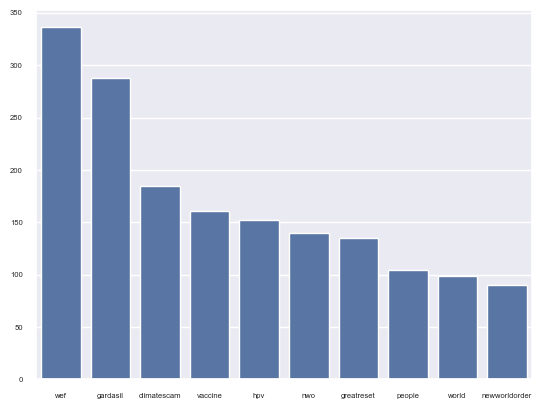

In [28]:
sns.barplot(x = words, y = numbers)
plt.savefig("topcommon_en.png", dpi=300)
plt.show()

In [29]:
#bag of words
corpus = [id2word.doc2bow(text) for text in corpus_model]

In [30]:
#Train computer and compute coherence
import gensim

In [31]:
#high accuracy
num_topics = 10
model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                id2word=id2word, 
                                                num_topics=num_topics, 
                                                chunksize=2000, 
                                                iterations = 400, 
                                                passes = 20, 
                                                eval_every = None)

In [32]:
topic_print_model = model.print_topics(num_words=30)
df_topic_print_model = pd.DataFrame(topic_print_model, columns=['topic_id','words'])
df_topic_print_model

,topic_id,words
0,0,"0.017*""new"" + 0.017*""world"" + 0.014*""look"" + 0..."
1,1,"0.052*""climatescam"" + 0.045*""agenda"" + 0.028*""..."
2,2,"0.036*""wef"" + 0.016*""watch"" + 0.011*""resist"" +..."
3,3,"0.079*""gardasil"" + 0.048*""vaccine"" + 0.041*""hp..."
4,4,"0.037*""wef"" + 0.025*""room"" + 0.018*""globalist""..."
5,5,"0.076*""nwo"" + 0.061*""wef"" + 0.054*""greatreset""..."
6,6,"0.024*""world"" + 0.016*""wef"" + 0.015*""control"" ..."
7,7,"0.127*""gardasil"" + 0.065*""hpv"" + 0.064*""vaccin..."
8,8,"0.059*""wef"" + 0.043*""wefpuppet"" + 0.021*""thegr..."
9,9,"0.030*""wef"" + 0.024*""take"" + 0.023*""king"" + 0...."


In [33]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=model, texts=data_english['doc_lemmatized'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3600624954744827


In [34]:
df_topic_print_model.to_csv("topicmodelling_english.csv")

Italian data

In [35]:
data_italian['char_count'] = data_italian['full_text'].apply(lambda x: len(x))
data_italian["word_count"] = data_italian['full_text'].apply(lambda x: len(x.split()))

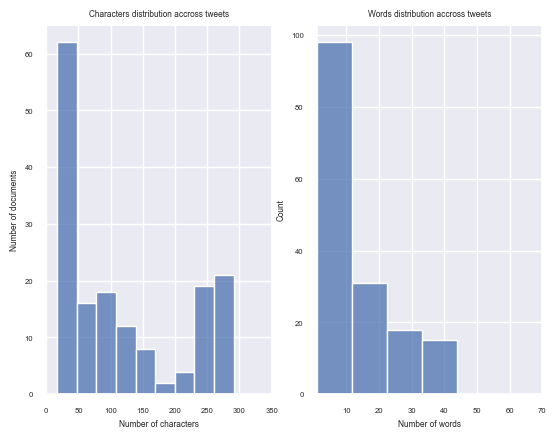

In [36]:
f, axes = plt.subplots(1, 2)

plot1 = sns.histplot(data_italian.char_count, binwidth = 30, ax=axes[0]).set(title='Characters distribution accross tweets', xlabel='Number of characters', ylabel='Number of documents')
plot2 = sns.histplot(data_italian.word_count, binwidth = 10, ax=axes[1]).set(title='Words distribution accross tweets', xlabel='Number of words')
axes[1].set_xlim(1,70)
axes[0].set_xlim(0,350)
plt.show()
f.savefig("word_char_it.png", dpi=300)


In [37]:
#tokenize
data_italian['tokens'] = data_italian['full_text'].apply(lambda x: nltk.word_tokenize(x))

In [38]:
data_italian['doc_prep'] = data_italian['tokens'].apply(lambda x: [w.lower() for w in x if w.isalpha() and len(w) > 2])

In [39]:
data_italian['doc_prep_nostop'] = data_italian['doc_prep'].apply(lambda x: [w for w in x if not w in it_stopwords])

In [40]:
it_nlp = spacy.load("it_core_news_sm", disable = ['parser','ner'])
def lemmatize(doc):
    lemmatized_doc = []
    for w in list(it_nlp.pipe(doc)):
        lemmatized_doc.append(" ".join(token.lemma_ for token in w))
    return lemmatized_doc
data_italian['lemmatize'] = data_italian['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [41]:
corpus_model = data_italian['lemmatize']
id2word = corpora.Dictionary(corpus_model)
id2word.filter_extremes(no_below = 5)
common = id2word.most_common(10)
common

[('gardasil', 78),
 ('giorgiamelone', 14),
 ('belpietrotweet', 12),
 ('franborgonovare', 12),
 ('ivreich', 12),
 ('ladyonorare', 12),
 ('laveritaweb', 12),
 ('madforfrea', 12),
 ('matteosalvinimo', 12),
 ('rusembitaly', 12)]

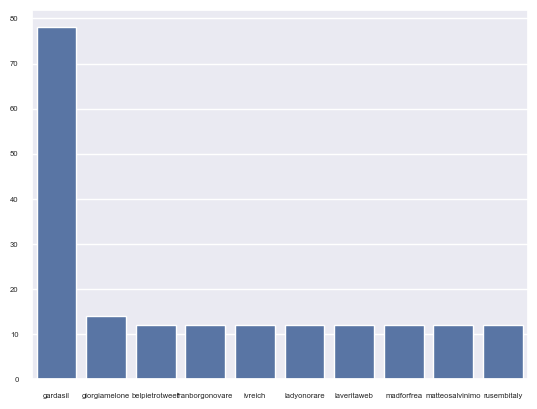

In [42]:
#plot
words = []
numbers = []
for c in common:
    w = c[0]
    words.append(w)
    
    n = c[1]
    numbers.append(n)
sns.barplot(x = words, y = numbers)
plt.savefig("topcommon_it.png", dpi=300)
plt.show()


In [43]:
corpus = [id2word.doc2bow(text) for text in corpus_model]
num_topics = 10
model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                id2word=id2word, 
                                                num_topics=num_topics, 
                                                chunksize=2000, 
                                                iterations = 400, 
                                                passes = 20, 
                                                eval_every = None)
topic_print_model = model.print_topics(num_words=30)
df_topic_print_model = pd.DataFrame(topic_print_model, columns=['topic_id','words'])
df_topic_print_model

,topic_id,words
0,0,"0.345*""gardasil"" + 0.228*""vaccination"" + 0.203..."
1,1,"0.623*""Italia"" + 0.110*""energia"" + 0.009*""gior..."
2,2,"0.147*""energia"" + 0.133*""Russia"" + 0.133*""ener..."
3,3,"0.114*""giorgiamelone"" + 0.097*""franborgonovare..."
4,4,"0.290*""fare"" + 0.254*""gardasil"" + 0.177*""Hpv"" ..."
5,5,"0.032*""gardasil"" + 0.031*""Hpv"" + 0.031*""associ..."
6,6,"0.386*""francia"" + 0.386*""globalista"" + 0.008*""..."
7,7,"0.469*""wef"" + 0.354*""usare"" + 0.009*""Italia"" +..."
8,8,"0.211*""wef"" + 0.211*""son"" + 0.019*""gardasil"" +..."
9,9,"0.705*""gardasil"" + 0.119*""associationpec"" + 0...."


In [44]:
coherence_model_lda = CoherenceModel(model=model, texts=data_italian['lemmatize'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5239861141354044


In [45]:
df_topic_print_model.to_csv("topicmodelling_italian.csv")

French dataset

In [46]:
data_french['char_count'] = data_french['full_text'].apply(lambda x: len(x))
data_french["word_count"] = data_french['full_text'].apply(lambda x: len(x.split()))

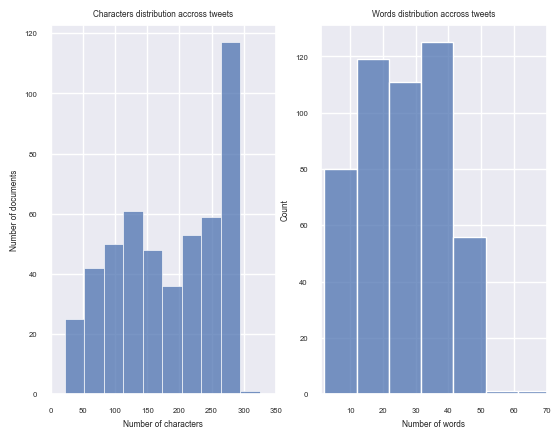

In [47]:
f, axes = plt.subplots(1, 2)

plot1 = sns.histplot(data_french.char_count, binwidth = 30, ax=axes[0]).set(title='Characters distribution accross tweets', xlabel='Number of characters', ylabel='Number of documents')
plot2 = sns.histplot(data_french.word_count, binwidth = 10, ax=axes[1]).set(title='Words distribution accross tweets', xlabel='Number of words')
axes[1].set_xlim(1,70)
axes[0].set_xlim(0,350)
plt.show()
f.savefig("word_char_fr.png", dpi=300)


In [48]:
data_french['tokens'] = data_french['full_text'].apply(lambda x: nltk.word_tokenize(x))
data_french['doc_prep'] = data_french['tokens'].apply(lambda x: [w.lower() for w in x if w.isalpha() and len(w) > 2])
data_french['doc_prep_nostop'] = data_french['doc_prep'].apply(lambda x: [w for w in x if not w in fr_stopwords])

In [49]:
fr_nlp = spacy.load("fr_core_news_sm", disable = ['parser','ner'])
def lemmatize(doc):
    lemmatized_doc = []
    for w in list(fr_nlp.pipe(doc)):
        lemmatized_doc.append(" ".join(token.lemma_ for token in w))
    return lemmatized_doc
data_french['lemmatize'] = data_french['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [50]:
corpus_model = data_french['lemmatize']
id2word = corpora.Dictionary(corpus_model)
id2word.filter_extremes(no_below = 5)
common = id2word.most_common(10)
common

[('vaccin', 156),
 ('papillomavirus', 103),
 ('contre', 88),
 ('vaccination', 70),
 ('effet', 70),
 ('secondaire', 67),
 ('macron', 66),
 ('enfant', 64),
 ('faire', 61),
 ('tout', 52)]

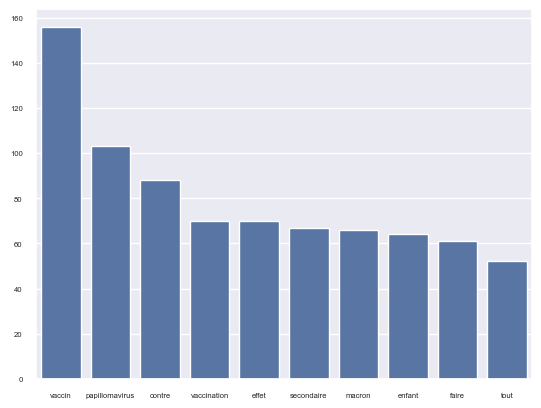

In [51]:
#plot
words = []
numbers = []
for c in common:
    w = c[0]
    words.append(w)
    
    n = c[1]
    numbers.append(n)
sns.barplot(x = words, y = numbers)
plt.savefig("topcommon_fr.png", dpi = 300)
plt.show()


In [52]:
corpus = [id2word.doc2bow(text) for text in corpus_model]
num_topics = 10
model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                id2word=id2word, 
                                                num_topics=num_topics, 
                                                chunksize=2000, 
                                                iterations = 400, 
                                                passes = 20, 
                                                eval_every = None)
topic_print_model = model.print_topics(num_words=30)
df_topic_print_model = pd.DataFrame(topic_print_model, columns=['topic_id','words'])
df_topic_print_model

,topic_id,words
0,0,"0.101*""papillomavirus"" + 0.063*""vaccin"" + 0.06..."
1,1,"0.097*""vaccin"" + 0.071*""papillomavirus"" + 0.07..."
2,2,"0.071*""vaccin"" + 0.052*""bon"" + 0.048*""plus"" + ..."
3,3,"0.110*""effet"" + 0.110*""secondaire"" + 0.082*""gr..."
4,4,"0.048*""tout"" + 0.046*""mettre"" + 0.036*""dire"" +..."
5,5,"0.081*""odd"" + 0.078*""devoir"" + 0.054*""propagan..."
6,6,"0.067*""faire"" + 0.057*""merck"" + 0.055*""procë"" ..."
7,7,"0.091*""enfant"" + 0.037*""vaccination"" + 0.035*""..."
8,8,"0.047*""faire"" + 0.046*""collëge"" + 0.045*""vacci..."
9,9,"0.038*""avant"" + 0.032*""tout"" + 0.032*""dire"" + ..."


In [53]:
coherence_model_lda = CoherenceModel(model=model, texts=data_french['lemmatize'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4279878508981455


In [54]:
df_topic_print_model.to_csv("topicmodelling_french.csv")

In [55]:
data_english.to_csv("english_tm.csv")
data_italian.to_csv("italian_tm.csv")


In [56]:
data_french.to_csv("french_tm.csv")

In [57]:
!pip install wordcloud


In [58]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

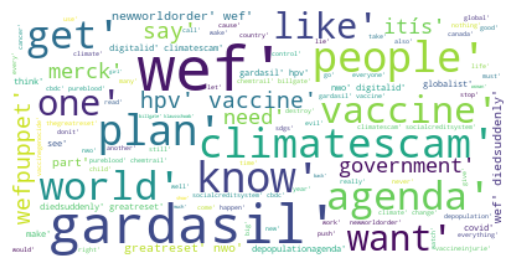

In [59]:
text = " ".join(data_english['doc_lemmatized'].astype(str))
wordcloud_en = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud_en, interpolation="bilinear")
plt.axis("off")
plt.savefig("englishwordcloud.png", dpi=300)
plt.show()

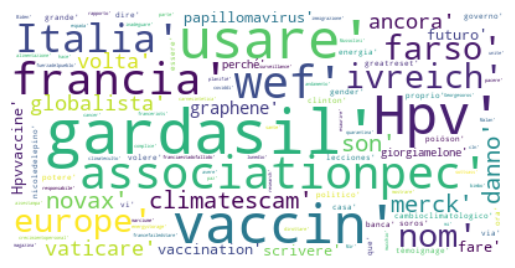

In [66]:
text1 = " ".join(data_italian['lemmatize'].astype(str))
unique_text = " ".join(set(text1.split()))
wordcloud_it = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(unique_text)
plt.figure()
plt.imshow(wordcloud_it, interpolation="bilinear")
plt.axis("off")
plt.savefig("italianwordcloud.png", dpi=300)
plt.show()

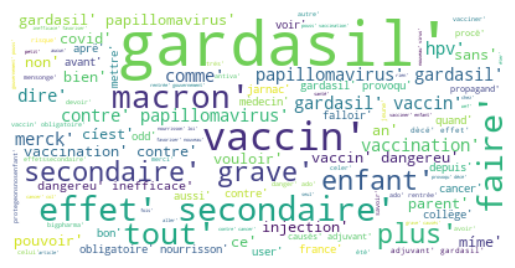

In [65]:
text2 = " ".join(data_french['lemmatize'].astype(str))
wordcloud_fr = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud_fr, interpolation="bilinear")
plt.axis("off")
plt.savefig("frenchwordcloud.png", dpi=300)
plt.show()

In [63]:
data_french['lemmatize']

0      [dimanche, comme, destitution, macrondestituti...
1      [gardasil, hpv, regarder, èlèment, procë, cont...
2      [danger, ado, rentrèe, gouvernement, pouss, va...
3      [papillomavirus, mensonge, propagand, gardasil...
4      [prison, non, camp, travail, dose, covid, gard...
                             ...                        
491    [fedorov, ministre, numèriqu, publiè, prèsenta...
492                            [compter, linky, arriver]
493    [savoir, tout, arriver, quand, prendre, contro...
494    [pendant, regarder, trou, cul, auquel, donnè, ...
495    [dècouverte, raedd, ong, raedd, ong, organisat...
Name: lemmatize, Length: 496, dtype: object